In [4]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset into a DataFrame
data = pd.read_csv("imdb_250_movies.csv")

# Display the first few rows of the dataset
print(data.head())

#Display shape
print(data.shape)


   rank                      name  year  rating               genre  \
0     1  The Shawshank Redemption  1994     9.3               Drama   
1     2             The Godfather  1972     9.2         Crime,Drama   
2     3           The Dark Knight  2008     9.0  Action,Crime,Drama   
3     4     The Godfather Part II  1974     9.0         Crime,Drama   
4     5              12 Angry Men  1957     9.0         Crime,Drama   

  certificate run_time                                            tagline  \
0           R   2h 22m  Fear can hold you prisoner. Hope can set you f...   
1           R   2h 55m                         An offer you can't refuse.   
2       PG-13   2h 32m                                    Why So Serious?   
3           R   3h 22m       All the power on earth can't change destiny.   
4    Approved   1h 36m  Life Is In Their Hands -- Death Is On Their Mi...   

      budget  box_office                                              casts  \
0   25000000    28884504  Tim R

In [5]:
# Count of movies by genre
genre_counts = data['genre'].value_counts()
print(genre_counts)


genre
Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Biography,Drama,History        9
Crime,Drama,Mystery            9
                              ..
Action,Thriller                1
Drama,Mystery,Sci-Fi           1
Comedy,Drama,Family            1
Comedy,Music,Romance           1
Comedy                         1
Name: count, Length: 104, dtype: int64


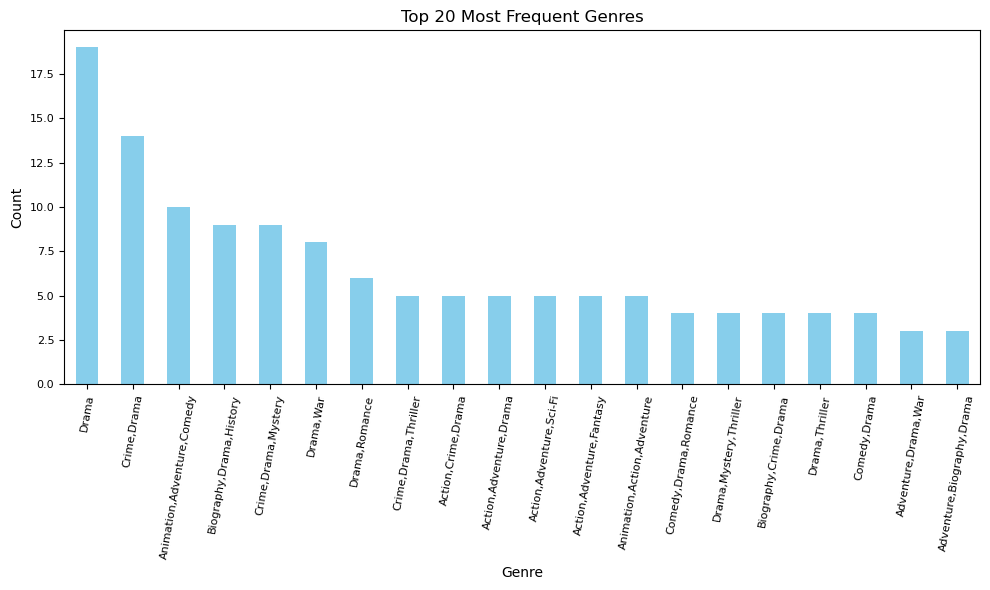

In [6]:
# Get genre counts
genre_counts = data['genre'].value_counts()

# Select top 20 genres
top_genres = genre_counts.head(20)

# Plot the counts
#There was a lot of genre so only displaying most frequent 20,otherwise plot get messy
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=80, fontsize=8)  # Rotate x-axis labels and reduce font size for better fit
plt.yticks(fontsize=8)  # Reduce font size of y-axis labels
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


year
1921    1
1924    1
1925    1
1926    1
1927    1
       ..
2018    4
2019    6
2020    2
2021    2
2022    1
Name: count, Length: 86, dtype: int64


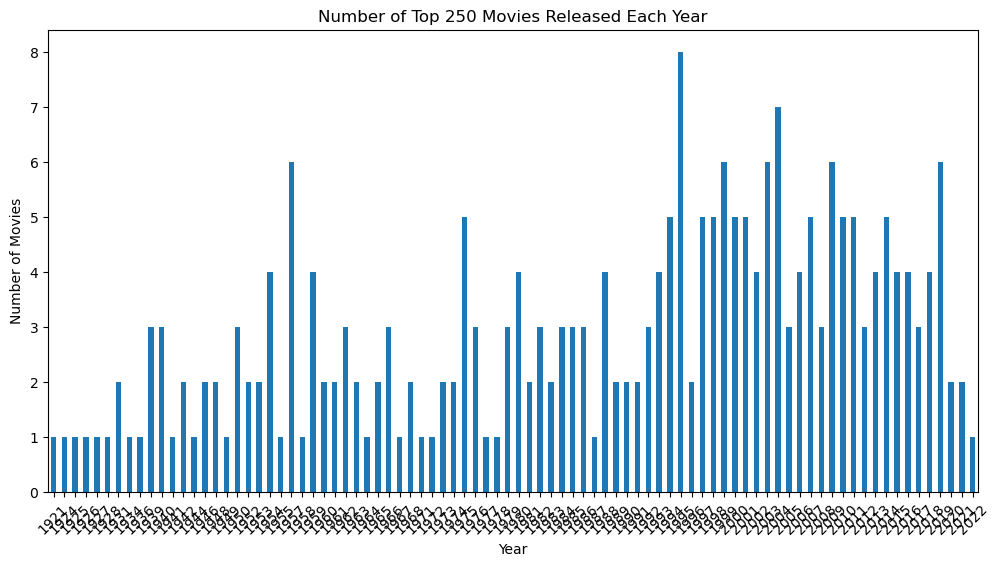

In [7]:
# Count of movies released each year
year_counts = data['year'].value_counts().sort_index()
print(year_counts)

# Plotting
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.title('Number of Top 250 Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


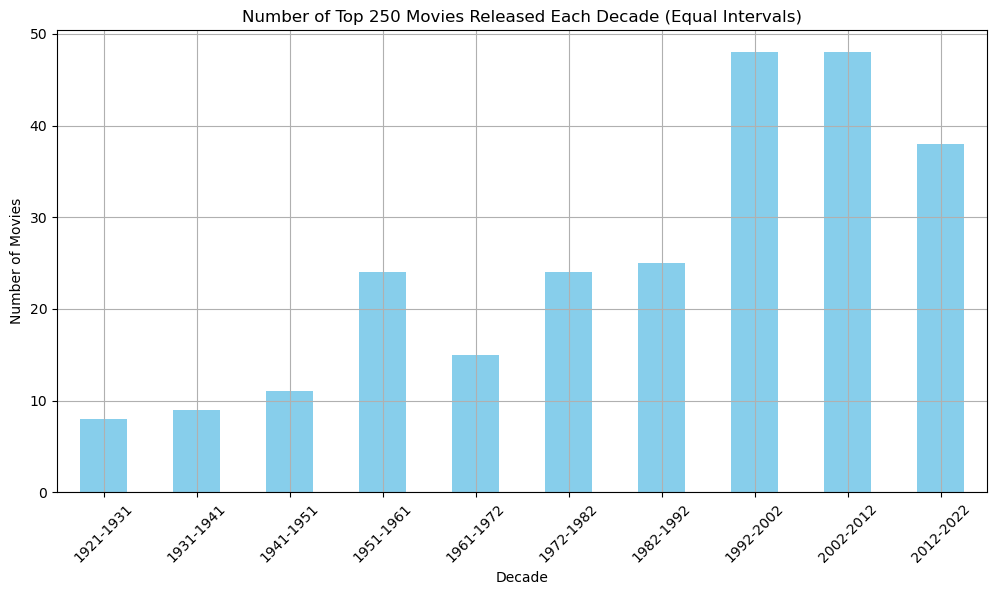

In [8]:
#Movies separated into lots of year,so zooming out of this and analyse it as decades
# Define the bins for 10 equal intervals
bins = pd.cut(data['year'], bins=10)

# Count the number of movies in each bin
movies_per_bin = bins.value_counts().sort_index()

# Round the bin edges to integers
bin_labels = [f'{round(b.left)}-{round(b.right)}' for b in movies_per_bin.index]

# Plotting
plt.figure(figsize=(12, 6))
movies_per_bin.plot(kind='bar', color='skyblue')
plt.title('Number of Top 250 Movies Released Each Decade (Equal Intervals)')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(range(len(bin_labels)), bin_labels, rotation=45)
plt.grid(True)
plt.show()



In [9]:
#Missing row at 247
data[['budget','box_office']]

,budget,box_office
0,25000000,28884504
1,6000000,250341816
2,185000000,1006234167
3,13000000,47961919
4,350000,955
...,...,...
245,25000000,216639112
246,4000000,14480
247,Not Available,Not Available
248,22000000,52767889


In [10]:
value_in_row_247 = data.iloc[247]['budget']
print(value_in_row_247)

Not Available


In [11]:
# Replace 'Not Available' with 0 in the entire DataFrame
data = data.replace('Not Available', 0)

# Convert 'budget' and 'box_office' columns to numeric
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['box_office'] = pd.to_numeric(data['box_office'], errors='coerce')

# Check the data types of the columns
print(data.dtypes)

# Now you can calculate the correlation
correlation = data['budget'].corr(data['box_office'])
print("Correlation between budget and box_office:", correlation)


rank             int64
name            object
year             int64
rating         float64
genre           object
certificate     object
run_time        object
tagline         object
budget         float64
box_office     float64
casts           object
directors       object
writers         object
dtype: object
Correlation between budget and box_office: 0.26996018420861273


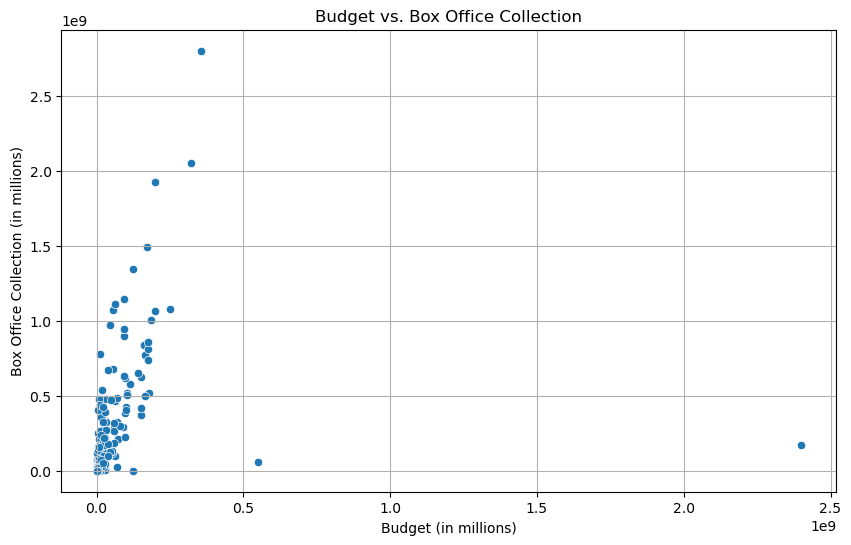

In [13]:
# Scatter plot of budget vs. box office collection
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='box_office', data=data)
plt.title('Budget vs. Box Office Collection')
plt.xlabel('Budget (in millions)')
plt.ylabel('Box Office Collection (in millions)')
plt.grid(True)
plt.show()


Correlation between budget and rating: 0.07277660273234898


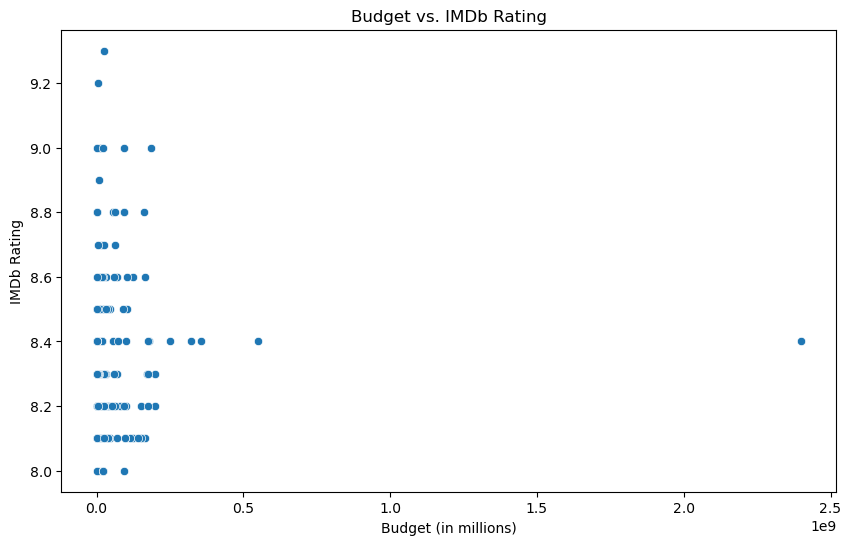

In [20]:
# Now you can calculate the correlation
correlation = data['budget'].corr(data['rating'])
print("Correlation between budget and rating:", correlation)


# Scatter plot of budget vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='rating', data=data)
plt.title('Budget vs. IMDb Rating')
plt.xlabel('Budget (in millions)')
plt.ylabel('IMDb Rating')
plt.show()


C:\Users\obagi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


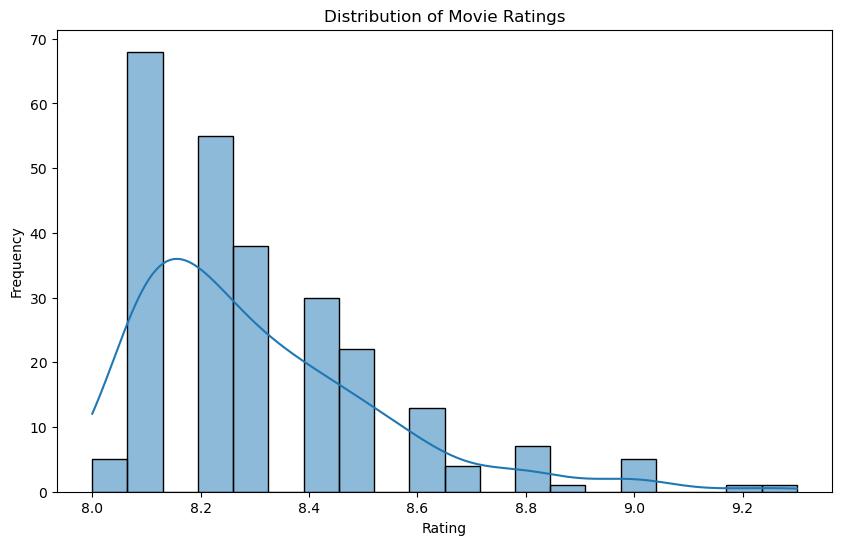

In [14]:
# Distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


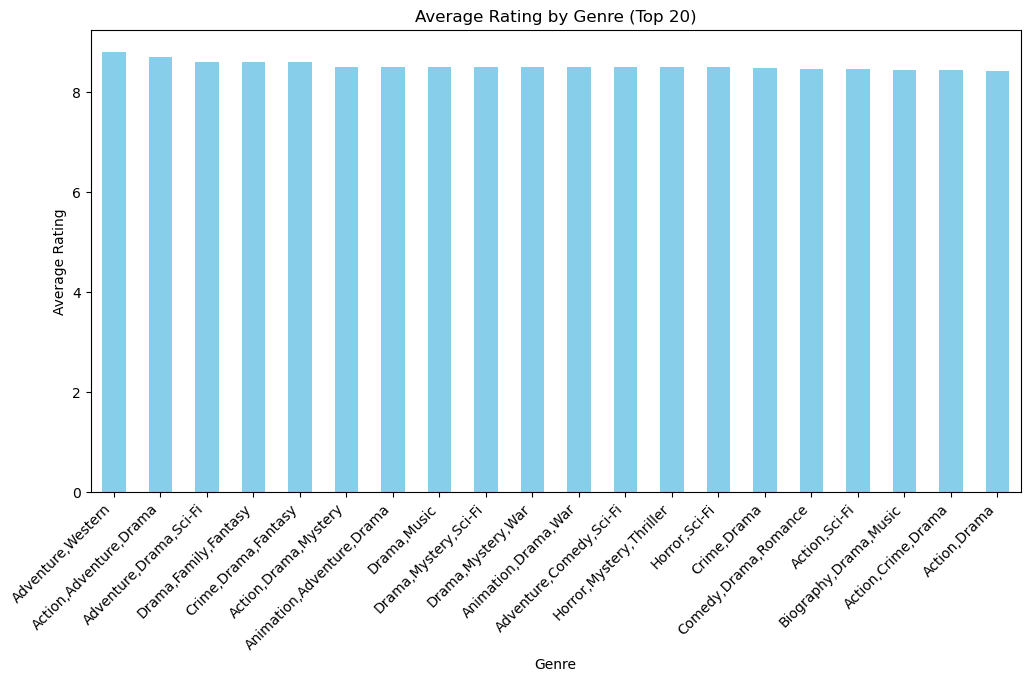

In [19]:
# Average rating by genre for top 20 genres
top20_genre_ratings = data.groupby('genre')['rating'].mean().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
top20_genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Genre (Top 20)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
# Count of movies by certificate
certificate_counts = data['certificate'].value_counts()
print(certificate_counts)


certificate
R            97
PG           37
PG-13        35
Not Rated    24
G            19
Passed       16
Approved     14
18+           1
0             1
TV-PG         1
Unrated       1
X             1
13+           1
TV-MA         1
GP            1
Name: count, dtype: int64


In [16]:
# Top writers with the most movies in the top 250 list
top_writers = data['writers'].value_counts().head(10)
print(top_writers)


writers
Charles Chaplin                                 4
J.R.R. Tolkien,Fran Walsh,Philippa Boyens       3
Ingmar Bergman                                  3
Stephen King,Frank Darabont                     2
Christopher Markus,Stephen McFeely,Stan Lee     2
Quentin Tarantino                               2
Akira Kurosawa,Shinobu Hashimoto,Hideo Oguni    2
Guy Ritchie                                     2
Hayao Miyazaki                                  2
Nicholas Pileggi,Martin Scorsese                2
Name: count, dtype: int64


In [17]:
# Top cast members with the most movies in the top 250 list
top_cast = data['casts'].value_counts().head(10)
print(top_cast)


casts
Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,Clancy Brown,Gil Bellows,Mark Rolston,James Whitmore,Jeffrey DeMunn,Larry Brandenburg,Neil Giuntoli,Brian Libby,David Proval,Joseph Ragno,Jude Ciccolella,Paul McCrane,Renee Blaine,Scott Mann                                           1
Hitoshi Takagi,Noriko Hidaka,Chika Sakamoto,Shigesato Itoi,Sumi Shimamoto,Tanie Kitabayashi,Hiroko Maruyama,Machiko Washio,Reiko Suzuki,Masashi Hirose,Toshiyuki Amagasa,Shigeru Chiba,Naoki Tatsuta,Tarako,Tomohiro Nishimura,Mitsuko Ishida,Chie Kôjiro,Daiki Nakamura                      1
Clark Gable,Vivien Leigh,Thomas Mitchell,Barbara O'Neil,Evelyn Keyes,Ann Rutherford,George Reeves,Fred Crane,Hattie McDaniel,Oscar Polk,Butterfly McQueen,Victor Jory,Everett Brown,Howard Hickman,Alicia Rhett,Leslie Howard,Olivia de Havilland,Rand Brooks                                 1
Jason Flemyng,Dexter Fletcher,Nick Moran,Jason Statham,Steven Mackintosh,Nicholas Rowe,Nick Marcq,Charles Forbes,Vinnie Jones,Lenn